In [9]:
import matplotlib
%matplotlib inline
from pylab import *
import networkx as nx
import random as rd

[0, 1, 4, 2, 5, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


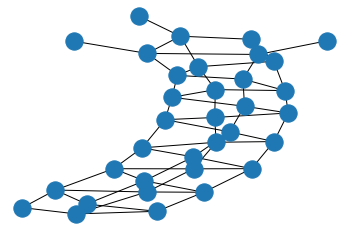

In [20]:
# Barabási Albert simulation


n = 30 # number of nodes
k = 4 # number of neighbors of each node

def initialize():
    global g
    g = nx.Graph()
    for i in range(n):
        # trying like this? to connect to the 4 nearest neighbors. 
        # also so that it starts out in a grid like shape? but not 100% sure
        g.add_edge(i, (i + 1))
        g.add_edge(i, (i + 4))
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    cla()
    nx.draw(g, pos = g.pos)

def update():
    global g
    g.count += 1
    if g.count % 20 == 0: # rewiring once in every 20 steps
        nds = list(g.nodes)
        i = rd.choice(nds)
        if g.degree[i] > 0:
            g.remove_edge(i, rd.choice(list(g.neighbors(i))))
            nds.remove(i)
            for j in g.neighbors(i):
                nds.remove(j)
            g.add_edge(i, rd.choice(nds))

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

    
initialize()
print(g.nodes)
for i in range(10):
    update()
observe()

[0, 1, 29, 2, 28, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


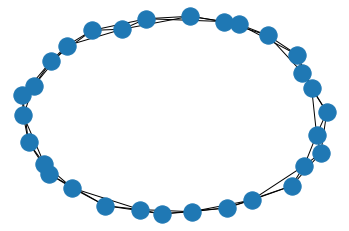

In [21]:
# Watts Strogatz simulation

n = 30 # number of nodes
k = 4 # number of neighbors of each node

def initialize():
    global g
    g = nx.Graph()
    for i in range(n):
        for j in range(1, k // 2 + 1):
            g.add_edge(i, (i + j) % n)
            g.add_edge(i, (i - j) % n)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    cla()
    nx.draw(g, pos = g.pos)

def update():
    global g
    g.count += 1
    if g.count % 20 == 0: # rewiring once in every 20 steps
        nds = list(g.nodes)
        i = rd.choice(nds)
        if g.degree[i] > 0:
            g.remove_edge(i, rd.choice(list(g.neighbors(i))))
            nds.remove(i)
            for j in g.neighbors(i):
                nds.remove(j)
            g.add_edge(i, rd.choice(nds))

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)
    
initialize()
print(g.nodes)
for i in range(10):
    update()
observe()

[0, 29, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


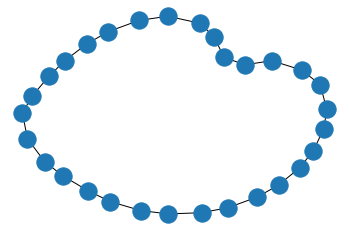

In [22]:
n = 30 # number of nodes
k = 4 # number of neighbors of each node

def initialize():
    global g
    g = nx.Graph()
    for i in range(n):
        for j in [-1, 0, 1]: # to update so each node is connected to the four neighbors
            g.add_edge(i, (i + j) % n)
            g.add_edge(i, (i - j) % n)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    cla()
    nx.draw(g, pos = g.pos)

def update():
    global g
    g.count += 1
    if g.count % 20 == 0: # rewiring once in every 20 steps
        nds = list(g.nodes)
        i = rd.choice(nds)
        if g.degree[i] > 0:
            g.remove_edge(i, rd.choice(list(g.neighbors(i))))
            nds.remove(i)
            for j in g.neighbors(i):
                nds.remove(j)
            g.add_edge(i, rd.choice(nds))

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)
    
initialize()
print(g.nodes)
for i in range(10):
    update()
observe()

In [23]:
def initialize():
    global g
    g = nx.complete_graph(m0)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    cla()
    nx.draw(g, pos = g.pos)

def pref_select(nds):
    global g
    r = uniform(0, sum(g.degree(i) for i in nds))
    x=0
    for i in nds:
        x += g.degree[i]
        if r <= x:
            return i

def update():
    global g
    g.count += 1
    if g.count % 20 == 0: # network growth once in every 20 steps
        nds = list(g.nodes)
        newcomer = max(nds) + 1
        for i in range(m):
            j = pref_select(nds)
            g.add_edge(newcomer, j)
            nds.remove(j)
        g.pos[newcomer] = (0, 0)

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

[0, 1, 2, 3, 4]


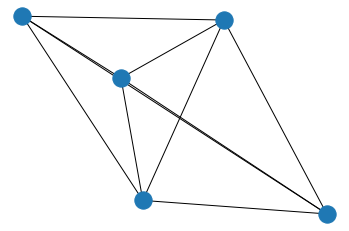

In [24]:
m0 = 5 # number of nodes in initial condition
m = 1 # number of edges per new node

initialize()
print(g.nodes)
for i in range(10):
    update()
observe()

[0, 1, 2, 3, 4]


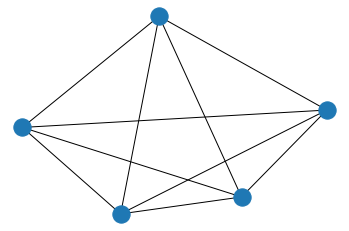

In [25]:
m0 = 5 # number of nodes in initial condition
m = 2 # number of edges per new node

initialize()
print(g.nodes)
for i in range(10):
    update()
observe()

[0, 1, 2, 3, 4]


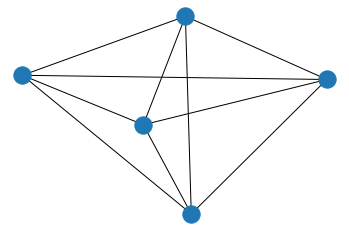

In [26]:
m0 = 5 # number of nodes in initial condition
m = 5 # number of edges per new node

initialize()
print(g.nodes)
for i in range(10):
    update()
observe()